https://www.datacamp.com/tutorial/sklearn-linear-regression


https://www.datacamp.com/tutorial/multivariate-linear-regression

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("./datasets/50_Startups.csv")
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [3])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_predict = lr.predict(X_test)
np.set_printoptions(precision=2)
np.concatenate(
    (y_predict.reshape(len(y_predict), 1), y_test.reshape(len(y_test), 1)), axis=1
)

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

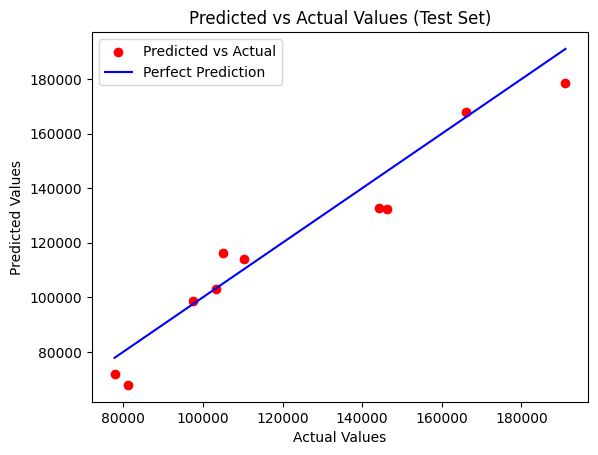

In [15]:
# Visualizing the test set results
plt.scatter(y_test, y_predict, color="r", label="Predicted vs Actual")
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="b",
    linestyle="-",
    label="Perfect Prediction",
)
plt.title("Predicted vs Actual Values (Test Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()